In [1]:
!pip install -q mediapipe==0.10.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 21.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking, Dropout, Bidirectional
from google.colab.patches import cv2_imshow
import cv2
import sys
import keras
import csv
from tensorflow.keras.utils import to_categorical
import os
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from functools import reduce
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import sys
import mediapipe as mp
import csv
import os
import pandas as pd
from google.colab import drive
import pickle

In [3]:
# from google.colab import drive, files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
video = '/content/gdrive/MyDrive/Boxing_data_raw/2/side/lead upper rear upperlead hook.mkv'

In [5]:
def write_landmarks_to_list(landmarks, csv_data):
  # print(f"Landmark coordinates for frame {frame_number}:")
  frame_data= []

  for idx, landmark in enumerate(landmarks):
      # print(f"{mp_pose.PoseLandmark(idx).name}: (x: {landmark.x}, y: {landmark.y}, z: {landmark.z})")
      frame_data.append(landmark.x)
      frame_data.append(landmark.y)
      frame_data.append(landmark.z)

  # print("\n")
  csv_data.append(frame_data)

In [6]:
def compute_media_pipe(video_path):
    # Initialize MediaPipe Pose and Drawing utilities
    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils
    pose = mp_pose.Pose()

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    frame_number = 0
    landmark_data = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame with MediaPipe Pose
        result = pose.process(frame_rgb)

        # Draw the pose landmarks on the frame
        if result.pose_landmarks:
            # mp_drawing.draw_landmarks(frame, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Add the landmark coordinates to the list
            write_landmarks_to_list(result.pose_landmarks.landmark, landmark_data)
    print(np.shape(landmark_data))

    # Release the VideoCapture object when done with each video
    cap.release()

    # landmark.apply

    return landmark_data

In [7]:
l = compute_media_pipe(video)

(812, 99)


In [8]:
def split_to_parts(landmarks, window_size, step):
  num_of_parts = len(landmarks) // step
  starts = [i*step for i in range(num_of_parts)]
  parts = []
  for i in starts:
    if i+window_size < len(landmarks):
      parts.append(landmarks[i:i+window_size])

  return parts

In [9]:
def pad_data(data, windows_size):
    padded_data = data
    for i in range(len(padded_data)):
        for j in range(151 - windows_size):
            padding_list = [-10] * 99
            padded_data[i].append(padding_list)

    return padded_data

In [11]:
model = keras.models.load_model('/content/gdrive/MyDrive/side_model.keras')

In [12]:
def make_predictions(x_test):
  y_pred = []
  for i in model.predict(x_test):
      y_pred.append(np.argmax(np.array(i)).astype("int32"))
  return y_pred

In [17]:
def plot_results(y_pred, step, movements, times):
  # Generate indices as time values
  t = [i/30*step for i in np.arange(len(y_pred))]
  plt.figure(figsize=(15, 5))
  # Plotting
  plt.plot(times,  movements, marker=None, linestyle='-', label = 'true', linewidth=2)
  plt.plot([i+step/30 for i in t], y_pred, marker=None, linestyle='-', label = 'predicted', linewidth=2)
  plt.title('Real video prediction')
  plt.xlabel('Time')
  plt.ylabel('Move')
  plt.yticks(range(0, 7), ["ready stance",
                            "jab",
                            "cross",
                            "lead hook",
                            "rear hook",
                            "lead uppercut",
                            "rear uppercut"])
  plt.legend(loc='upper left')
  # plt.grid(True)
  plt.show()


In [18]:
def main(window_size,step, movements, times):
    parts = split_to_parts(l, window_size, step)
    x_test = pad_data(parts, window_size)
    print(len(x_test))
    y_pred = make_predictions(x_test)
    plot_results(y_pred, step, movements, times)
    print(y_pred)

In [19]:
# 0 - ready stance
# 1 - jab
# 2 - cross
# 3 - lead hook
# 4 - rear hook
# 5 - lead uppercut
# 6 - rear uppercut


# ["ready stance",
# "jab",
# "cross",
# "lead hook",
# "rear hook",
# "lead uppercut",
# "rear uppercut"]


movements = [0,
             0,
             5,
             5,
             6,
             6,
             1,
             1,
             0,
             0,
             5,
             5,
             6,
             6,
             3,
             3,
             0,
             0,
             5,
             5,
             6,
             6,
             3,
             3,
             0,
             0,
             5,
             5,
             6,
             6,
             3,
             3,
             0,
             0,
             5,
             5,
             6,
             6,
             3,
             3,
             0,
             0,
             5,
             5,
             6,
             6,
             3,
             3,
             0,
             0,
             5,
             5,
             6,
             6,
             3,
             3,
             0,
             0]

times = [0,
         3,
         3,
         3+22/30,
         3+22/30,
         4+3/30,
         4+3/30,
         4+22/30,
         4+22/30,
         8+6/30,
         8+6/30,
         8+24/30,
         8+24/30,
         9+6/30,
         9+6/30,
         10,
         10,
         10+28/30,
         10+28/30,
         11+17/30,
         11+17/30,
         12+3/30,
         12+3/30,
         12+19/30,
         12+19/30,
         14+17/30,
         14+17/30,
         15+3/30,
         15+3/30,
         15+18/30,
         15+18/30,
         16+4/30,
         16+4/30,
         17+29/20,
         17+29/20,
         18+16/30,
         18+16/30,
         18+29/30,
         18+29/30,
         19+16/30,
         19+16/30,
         20+23/30,
         20+23/30,
         21+10/30,
         21+10/30,
         21+23/30,
         21+23/30,
         22+12/30,
         22+12/30,
         23+12/30,
         23+12/30,
         24+1/30,
         24+1/30,
         24+14/30,
         24+14/30,
         25+4/30,
         25+4/30,
         27
         ]

len(movements), len(times)

(58, 58)

79
3/3 [==============================] - 0s 73ms/step


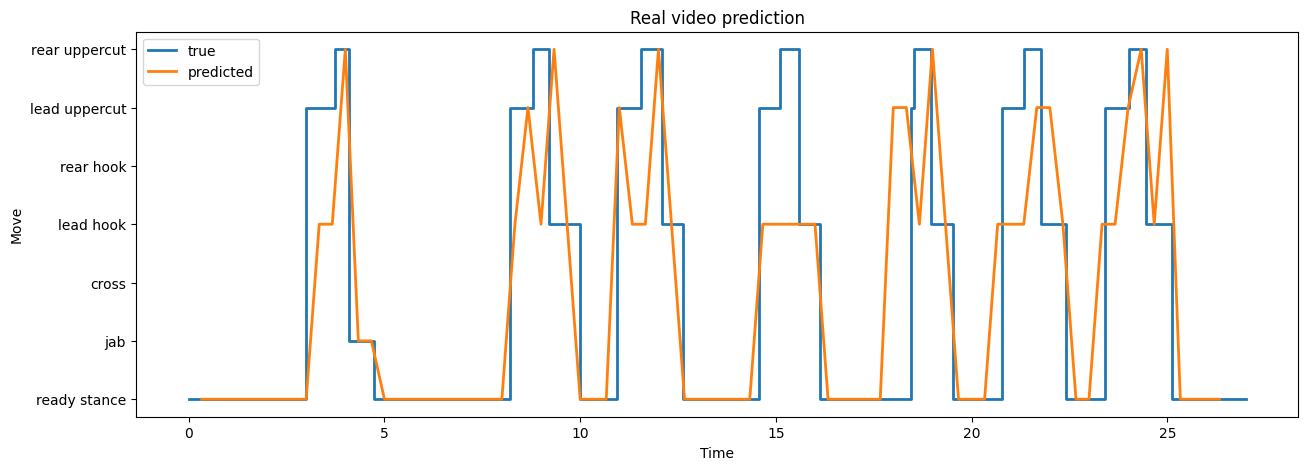

[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 3, 6, 3, 0, 0, 0, 5, 3, 3, 6, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 5, 5, 3, 6, 3, 0, 0, 0, 3, 3, 3, 5, 5, 3, 0, 0, 3, 3, 5, 6, 3, 6, 0, 0, 0, 0]


In [20]:
main(30, 10, movements, times)